# OS Prediction
In this section we should predict the operating system of cellphones based on data we have. This section has two parts.  The difference between these two parts is on "Battery Capacity" field from dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.base import clone
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pprint import pprint
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('./os_train_cleared.csv')
X_val = pd.read_csv('./os_val_cleared.csv')
X_test = pd.read_csv('./os_test_cleared.csv')
y_train = pd.read_csv('./target_train.csv')
y_val = pd.read_csv('./target_val.csv')
y_test = pd.read_csv('./target_test.csv')

In [3]:
X_train.shape

(1915, 27)

### Creating Models

In this Section we are going to describe some models and train them with our training data. then we will validate it with our validating data. at last, when we find our best model, we will use it to test the model with our test data.

our first model is a simple Decision Tree Classifier. 

In [4]:
def score_printer(y_train, train_predict, y_val, val_predict):
    print("F1_score of train: ", f1_score(y_true=y_train, y_pred=train_predict, average='weighted'))
    print("F1_score of validation: ", f1_score(y_true=y_val, y_pred=val_predict, average='weighted'))
    print("accuracy_score of train: ", accuracy_score(y_true=y_train, y_pred=train_predict))
    print("accuracy_score of validation: ", accuracy_score(y_true=y_val, y_pred=val_predict))
    print("Precision of train: ", precision_score(y_true=y_train, y_pred=train_predict, average='weighted'))
    print("Precision of validation: ", precision_score(y_true=y_val, y_pred=val_predict, average='weighted'))
    print("Recall of train: ", recall_score(y_true=y_train, y_pred=train_predict, average='weighted'))
    print("Recall of validation: ", recall_score(y_true=y_val, y_pred=val_predict, average='weighted'))

In [5]:
def heatmap(y_train, train_predict):
    cm = confusion_matrix(y_train,train_predict)

    sns.heatmap(cm , annot=True ,fmt='d')
    plt.xlabel("preficted Labels")
    plt.ylabel("True Lables")

#### Decision Tree Classifier

In [6]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
train_predict = dtc.predict(X_train)
val_predict = dtc.predict(X_val)
score_printer(y_train, train_predict, y_val, val_predict)


F1_score of train:  1.0
F1_score of validation:  0.9171597633136095
accuracy_score of train:  1.0
accuracy_score of validation:  0.9201183431952663
Precision of train:  1.0
Precision of validation:  0.9153846153846154
Recall of train:  1.0
Recall of validation:  0.9201183431952663


This result shows that our model is overfit! for example, compare confusion matrix of the result of predicted train and validation. it shows that in our train, we have guessed all "IOS" values correctly, but  in validation we guessed all of our "IOS" wrong! 

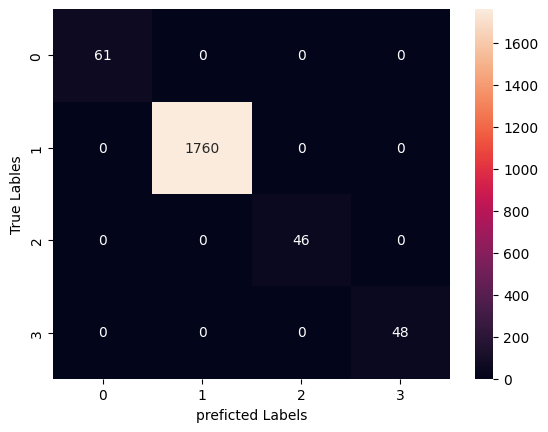

In [7]:
heatmap(y_train,train_predict)

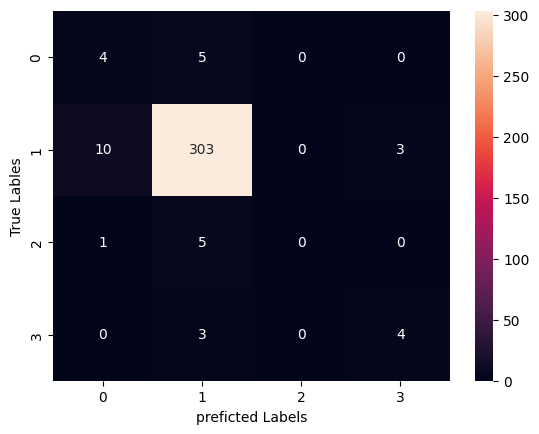

In [8]:
heatmap(y_val, val_predict)

Now, we try to work on our model. first, we will use a gridSeach to find our model with best hyper-parameters

In [9]:
tree_param = {'criterion':['gini','entropy', 'log_loss'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30],
              'max_features': ['auto', 'sqrt', 'log2'], 'splitter':['best', 'random']}
dtc_grid_result = GridSearchCV(dtc, tree_param, scoring='f1_weighted',cv=5)
dtc_grid_result.fit(X_train, y_train)
dtc_grid_result.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'splitter': 'random'}

In [11]:
dtc = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=15, max_features='auto', splitter='random')
dtc.fit(X_train, y_train)
train_predict = dtc.predict(X_train)
val_predict = dtc.predict(X_val)
score_printer(y_train, train_predict, y_val, val_predict)

F1_score of train:  0.9979007097245939
F1_score of validation:  0.9436647893762664
accuracy_score of train:  0.997911227154047
accuracy_score of validation:  0.9378698224852071
Precision of train:  0.997913005337514
Precision of validation:  0.9517071483107463
Recall of train:  0.997911227154047
Recall of validation:  0.9378698224852071


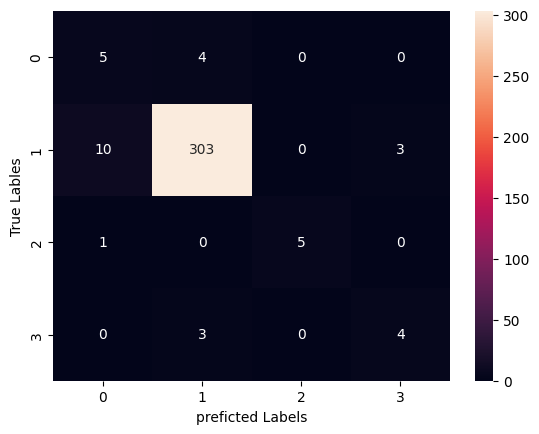

In [12]:
heatmap(y_val,val_predict)


It seems like with hyper-parameters shown below, we will get the best result. our accuracy_score on validation data is 93% and our f1_score on validation data is 94% and it seems like a good percent. Although, it seems like our prediction on IOS and and Other type of OS we have problems. But on Android and Windows phone our prediction is good

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'splitter': 'random'}

#### Stochasti Gradient Descent Classifier

In [13]:
sgdc = SGDClassifier(random_state=42)
sgdc.fit(X_train, y_train)
train_predict = sgdc.predict(X_train)
val_predict = sgdc.predict(X_val)
score_printer(y_train, train_predict, y_val, val_predict)

F1_score of train:  0.9506147475273021
F1_score of validation:  0.9221374779067087
accuracy_score of train:  0.9524804177545692
accuracy_score of validation:  0.9289940828402367
Precision of train:  0.9503345335176827
Precision of validation:  0.9279439696106362
Recall of train:  0.9524804177545692
Recall of validation:  0.9289940828402367


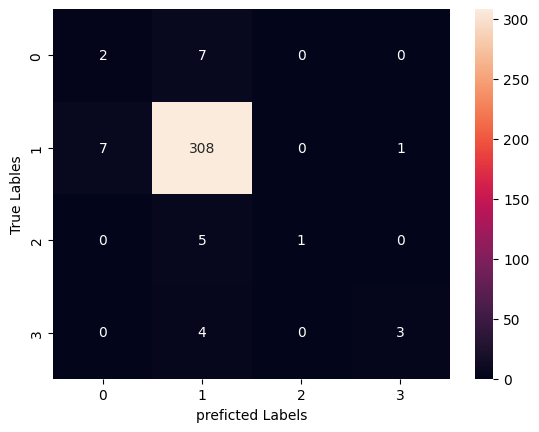

In [14]:
heatmap(y_val, val_predict)

In [15]:
sgdc = SGDClassifier(random_state=42)
sgdc.fit(X_train, y_train)
train_predict = sgdc.predict(X_train)
val_predict = sgdc.predict(X_val)
score_printer(y_train, train_predict, y_val, val_predict)

F1_score of train:  0.9506147475273021
F1_score of validation:  0.9221374779067087
accuracy_score of train:  0.9524804177545692
accuracy_score of validation:  0.9289940828402367
Precision of train:  0.9503345335176827
Precision of validation:  0.9279439696106362
Recall of train:  0.9524804177545692
Recall of validation:  0.9289940828402367


In [16]:
tree_param = {'loss':['hinge', 'perceptron', 'squared_error','huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
              'penalty':['l2', 'l1', 'elasticnet'], 'l1_ratio':[0.001, 0.01, 0.15], 'alpha':[0.0001, 0.001, 0.01]}
sgdc_grid_result = GridSearchCV(sgdc, tree_param, scoring='f1_weighted',cv=5)
sgdc_grid_result.fit(X_train, y_train)
sgdc_grid_result.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.001, 'loss': 'hinge', 'penalty': 'l1'}

In [17]:
sgdc = SGDClassifier(random_state=42, l1_ratio=0.001, loss='hinge', penalty='l1')
sgdc.fit(X_train, y_train)
val_predict = sgdc.predict(X_val)
score_printer(y_train, train_predict, y_val, val_predict)

F1_score of train:  0.9506147475273021
F1_score of validation:  0.9396024024431051
accuracy_score of train:  0.9524804177545692
accuracy_score of validation:  0.9408284023668639
Precision of train:  0.9503345335176827
Precision of validation:  0.9409721578156591
Recall of train:  0.9524804177545692
Recall of validation:  0.9408284023668639


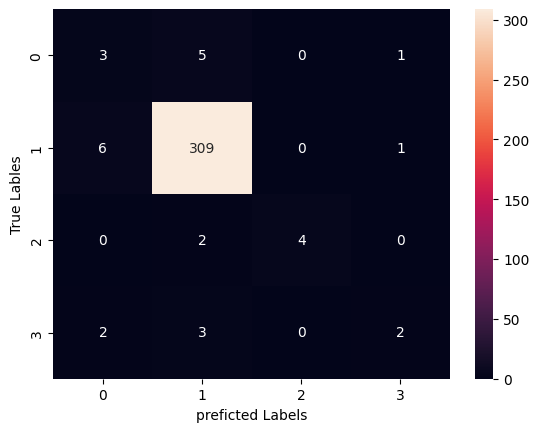

In [18]:
heatmap(y_val,val_predict)


It seems like 'SGDClassifier' does not bring us better scores. IOS and other still does not predict properly. 

#### Ada Boost Classifier 

In [19]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(random_state=42)
adaboost.fit(X_train, y_train)
val_predict = adaboost.predict(X_val)
score_printer(y_train, train_predict, y_val, val_predict)

F1_score of train:  0.9506147475273021
F1_score of validation:  0.84885167731207
accuracy_score of train:  0.9524804177545692
accuracy_score of validation:  0.8254437869822485
Precision of train:  0.9503345335176827
Precision of validation:  0.8822823531899447
Recall of train:  0.9524804177545692
Recall of validation:  0.8254437869822485


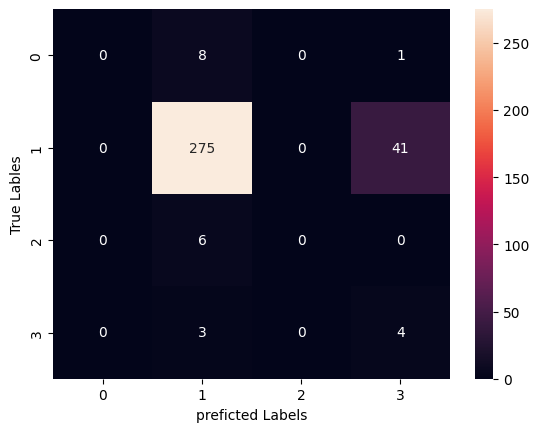

In [20]:
heatmap(y_val, val_predict)

In [22]:
tree_param = {'algorithm':['SAMME', 'SAMME.R'],
              'learning_rate':[0.001, 0.01, 1, 10]}
adaboost_result = GridSearchCV(adaboost, tree_param, scoring='f1_weighted',cv=5)
adaboost_result.fit(X_train, y_train)
adaboost_result.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1}

In [23]:
adaboost = AdaBoostClassifier(random_state=42, algorithm='SAMME')
adaboost.fit(X_train, y_train)
val_predict = adaboost.predict(X_val)
score_printer(y_train, train_predict, y_val, val_predict)

F1_score of train:  0.9506147475273021
F1_score of validation:  0.9167359422078629
accuracy_score of train:  0.9524804177545692
accuracy_score of validation:  0.9408284023668639
Precision of train:  0.9503345335176827
Precision of validation:  0.9265990419836574
Recall of train:  0.9524804177545692
Recall of validation:  0.9408284023668639


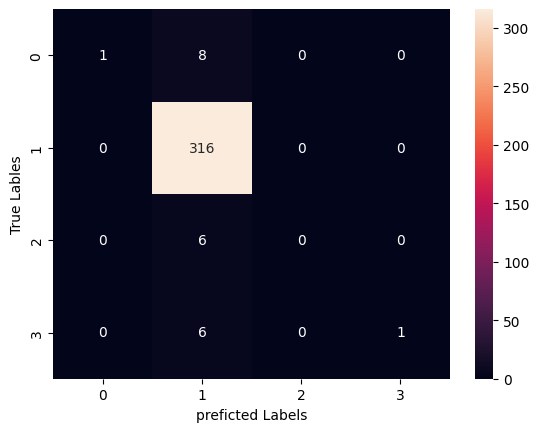

In [24]:
heatmap(y_val, val_predict)


As you can see above, with only changing the 'algorithm' heyper-parameter,  our  results improved for 'Android' OS. but for other types of OSes, it seems we have difficulties in this model. 

#### Gradient Boosting Classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
val_predict = gbc.predict(X_val)
score_printer(y_train, train_predict, y_val, val_predict)

F1_score of train:  0.9506147475273021
F1_score of validation:  0.9342578895463511
accuracy_score of train:  0.9524804177545692
accuracy_score of validation:  0.9437869822485208
Precision of train:  0.9503345335176827
Precision of validation:  0.9258017386222516
Recall of train:  0.9524804177545692
Recall of validation:  0.9437869822485208


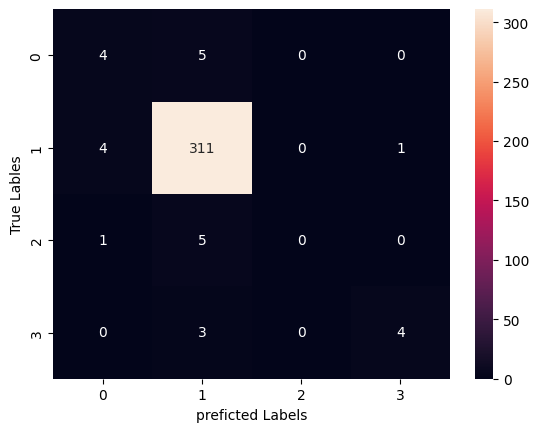

In [26]:
heatmap(y_val, val_predict)

In [28]:
tree_param = {'loss':['log_loss', 'exponential'], 'criterion': ['friedman_mse', 'squared_error'], 'max_depth': [3, 10, 30],
              'learning_rate':[0.001, 0.01, 1, 10]}
gbc_result = GridSearchCV(gbc, tree_param, scoring='f1_weighted',cv=5)
gbc_result.fit(X_train, y_train)
gbc_result.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.001,
 'loss': 'log_loss',
 'max_depth': 3}

In [29]:
gbc = GradientBoostingClassifier(random_state=42, criterion='friedman_mse', learning_rate=0.001, loss='log_loss')
gbc.fit(X_train, y_train)
val_predict = gbc.predict(X_val)
score_printer(y_train, train_predict, y_val, val_predict)

F1_score of train:  0.9506147475273021
F1_score of validation:  0.9034616289379875
accuracy_score of train:  0.9524804177545692
accuracy_score of validation:  0.9349112426035503
Precision of train:  0.9503345335176827
Precision of validation:  0.8740590315465144
Recall of train:  0.9524804177545692
Recall of validation:  0.9349112426035503


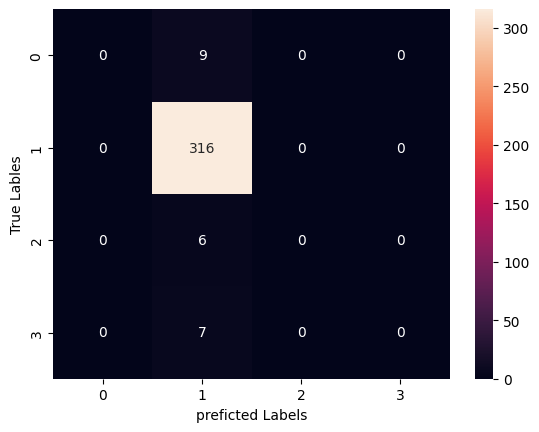

In [30]:
heatmap(y_val, val_predict)


This Model seems like having troubles. it seems like our tuned hyper-parameters only helped us in overfitting the model!

#### Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
val_predict = rfc.predict(X_val)
score_printer(y_train, train_predict, y_val, val_predict)

F1_score of train:  0.9506147475273021
F1_score of validation:  0.9809393550940464
accuracy_score of train:  0.9524804177545692
accuracy_score of validation:  0.9822485207100592
Precision of train:  0.9503345335176827
Precision of validation:  0.9816336311663414
Recall of train:  0.9524804177545692
Recall of validation:  0.9822485207100592


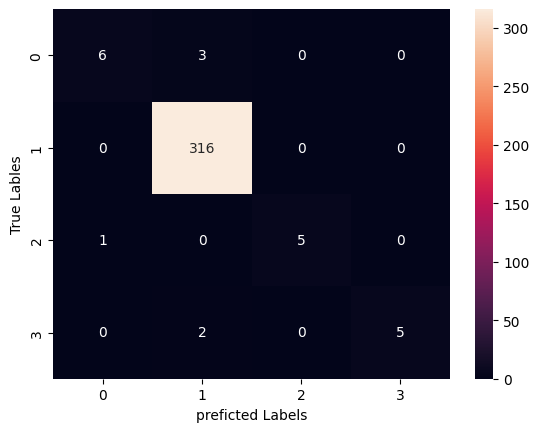

In [32]:
heatmap(y_val, val_predict)

In [33]:
tree_param = {'max_features':['sqrt', 'log2'], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [3, 10, 30]}
rfc_result = GridSearchCV(rfc, tree_param, scoring='f1_weighted',cv=5)
rfc_result.fit(X_train, y_train)
rfc_result.best_params_

{'criterion': 'entropy', 'max_depth': 30, 'max_features': 'log2'}

In [34]:
rfc = RandomForestClassifier(random_state=42, criterion='entropy', max_depth=30, max_features='log2')
rfc.fit(X_train, y_train)
val_predict = rfc.predict(X_val)
score_printer(y_train, train_predict, y_val, val_predict)

F1_score of train:  0.9506147475273021
F1_score of validation:  0.9772889577266234
accuracy_score of train:  0.9524804177545692
accuracy_score of validation:  0.9792899408284024
Precision of train:  0.9503345335176827
Precision of validation:  0.9787754051968099
Recall of train:  0.9524804177545692
Recall of validation:  0.9792899408284024


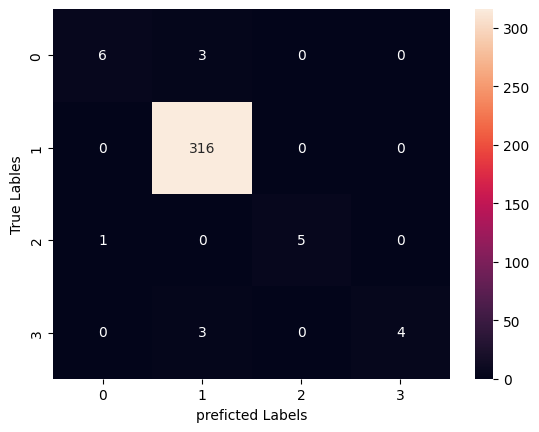

In [35]:
heatmap(y_val, val_predict)

So far, Random Forest Classifier was the best model for our data.  

#### K-Neighbor classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=4)
knc.fit(X_train, y_train)
val_predict = knc.predict(X_val)
score_printer(y_train, train_predict, y_val, val_predict)

F1_score of train:  0.9506147475273021
F1_score of validation:  0.9563983713455096
accuracy_score of train:  0.9524804177545692
accuracy_score of validation:  0.9556213017751479
Precision of train:  0.9503345335176827
Precision of validation:  0.9596807160323299
Recall of train:  0.9524804177545692
Recall of validation:  0.9556213017751479


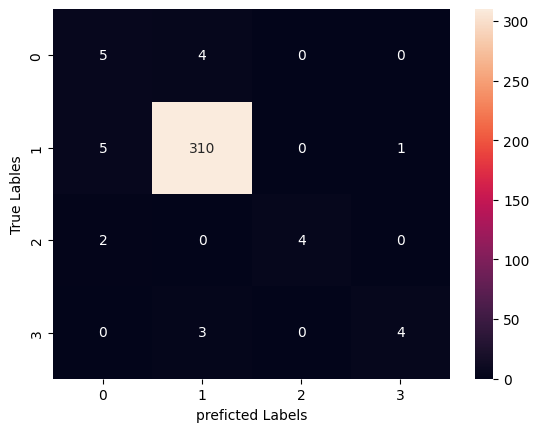

In [37]:
heatmap(y_val, val_predict)

In [42]:
tree_param = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 
              'weights': ['uniform', 'distance']}
knc_result = GridSearchCV(knc, tree_param, scoring='f1_weighted',cv=5)
knc_result.fit(X_train, y_train)
knc_result.best_params_

{'algorithm': 'auto', 'weights': 'distance'}

In [43]:
knc = KNeighborsClassifier(n_neighbors=4, algorithm='auto', weights='distance')
knc.fit(X_train, y_train)
val_predict = knc.predict(X_val)
score_printer(y_train, train_predict, y_val, val_predict)

F1_score of train:  0.9506147475273021
F1_score of validation:  0.9630121692530984
accuracy_score of train:  0.9524804177545692
accuracy_score of validation:  0.9644970414201184
Precision of train:  0.9503345335176827
Precision of validation:  0.9635724852071008
Recall of train:  0.9524804177545692
Recall of validation:  0.9644970414201184


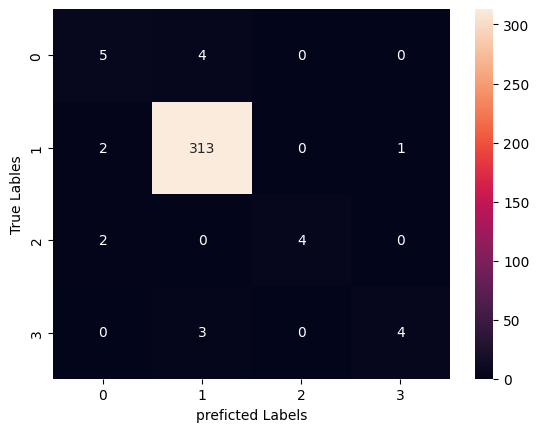

In [44]:
heatmap(y_val, val_predict)

K-Neighbor Classifier also worked very good. But so far, our best model has been Random Forest Classifier. now we are going to predict our test data and check f1_score for our test data.

In [45]:
test_predict = rfc.predict(X_test)
score_printer(y_train, train_predict, y_test, test_predict)

F1_score of train:  0.9506147475273021
F1_score of validation:  0.9395569492875394
accuracy_score of train:  0.9524804177545692
accuracy_score of validation:  0.9547738693467337
Precision of train:  0.9503345335176827
Precision of validation:  0.9568558907067305
Recall of train:  0.9524804177545692
Recall of validation:  0.9547738693467337


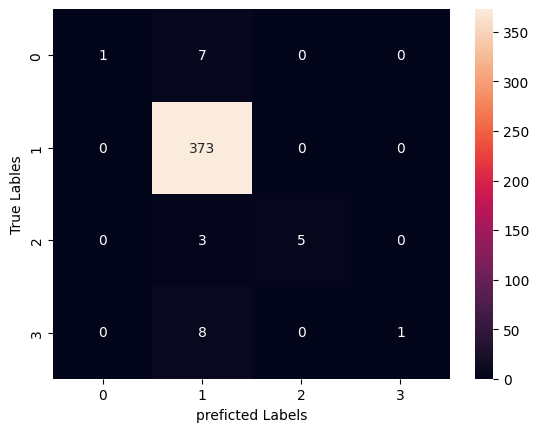

In [46]:
heatmap(y_test, test_predict)

iT seems our test data did not work fine with Random Forest Classifier. Specially on IOS and Other type of OS.
now we will test our data with K-Neighbor Classifier.

In [47]:
test_predict = knc.predict(X_test)
score_printer(y_train, train_predict, y_test, test_predict)

F1_score of train:  0.9506147475273021
F1_score of validation:  0.9416881685125148
accuracy_score of train:  0.9524804177545692
accuracy_score of validation:  0.9522613065326633
Precision of train:  0.9503345335176827
Precision of validation:  0.9351248429648241
Recall of train:  0.9524804177545692
Recall of validation:  0.9522613065326633


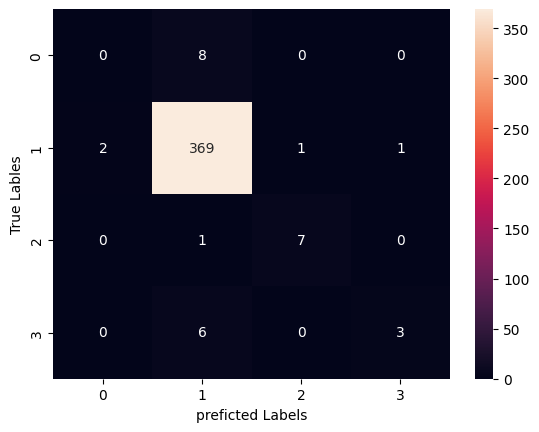

In [48]:
heatmap(y_test, test_predict)

Although we had better predictions on "IOS" and "Windows Phone", but it is not satisfying enough. Hence, we will search for a better model.

In [49]:
from sklearn.svm import SVC

svc=SVC(random_state=42)
svc.fit(X_train, y_train)
val_predict = svc.predict(X_val)
score_printer(y_train, train_predict, y_val, val_predict)

F1_score of train:  0.9506147475273021
F1_score of validation:  0.9564895205441574
accuracy_score of train:  0.9524804177545692
accuracy_score of validation:  0.9644970414201184
Precision of train:  0.9503345335176827
Precision of validation:  0.9595781754819036
Recall of train:  0.9524804177545692
Recall of validation:  0.9644970414201184


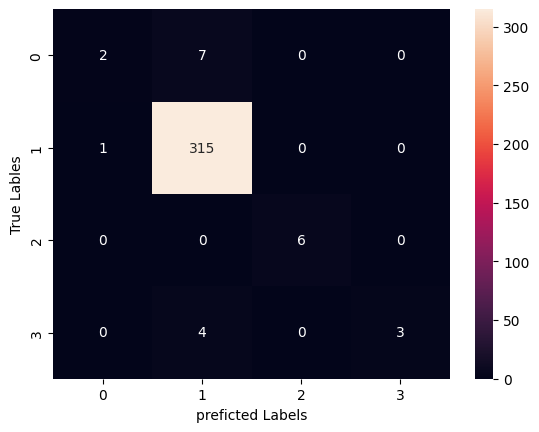

In [50]:
heatmap(y_val, val_predict)

In [58]:
tree_param = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}
svc_result = GridSearchCV(svc, tree_param, scoring='f1_weighted',cv=5)
svc_result.fit(X_train, y_train)
svc_result.best_params_

{'gamma': 'scale', 'kernel': 'poly'}

In [59]:
svc=SVC(random_state=42, kernel='poly', gamma='scale')
svc.fit(X_train, y_train)
val_predict = svc.predict(X_val)
score_printer(y_train, train_predict, y_val, val_predict)

F1_score of train:  0.9506147475273021
F1_score of validation:  0.9664940828402367
accuracy_score of train:  0.9524804177545692
accuracy_score of validation:  0.9704142011834319
Precision of train:  0.9503345335176827
Precision of validation:  0.9693079949490206
Recall of train:  0.9524804177545692
Recall of validation:  0.9704142011834319


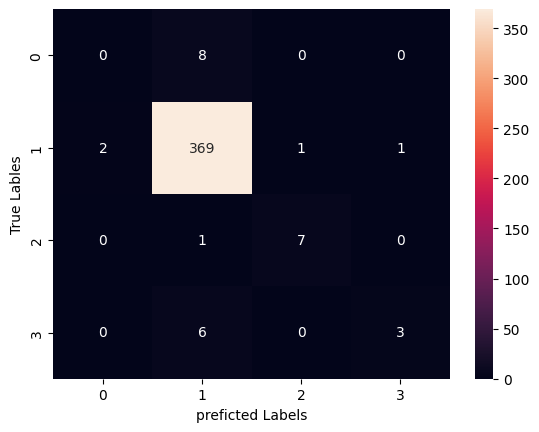

In [60]:
heatmap(y_test, test_predict)